<a href="https://colab.research.google.com/github/NarendraPolimera/MDSC-301-ML/blob/main/smart_watch_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount(f'/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [190]:
data = pd.read_csv('/content/drive/MyDrive/MDSC-301-ML_Practical/data sets/boAt Wave Call Smart Watch Smart Talk with Advanced Dedicated Bluetooth Calling Chip_raw.csv')

## EDA

In [191]:
data.head()

,Names,stars,Review_header,reviews
0,AV,4,Not Polished Enough. (Improving with updates),[Update: Sept 29] boAt seems to have heard the...
1,Durga mani kartheek,4,One of the best build quality of this price range,The heart rate sensor is 90% to 85% accurateI ...
2,Mihika a.,4,They didn't send the charger with the watch.,Boat smart watch is good but I didn't get the ...
3,Neeraj Maurya,4,This is nice but whenever connected through BT...,This is nice in that price cap. but I think sh...
4,aditya,4,Good in comparison with Fireboltt.,Used fireboltt watch but was not satisfied wit...


In [192]:
data.duplicated().sum()

0

In [193]:
data.stars.value_counts()

5    572
1    362
4    182
3    113
2     99
Name: stars, dtype: int64

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Names          1328 non-null   object
 1   stars          1328 non-null   int64 
 2   Review_header  1328 non-null   object
 3   reviews        1263 non-null   object
dtypes: int64(1), object(3)
memory usage: 41.6+ KB


In [195]:
data.describe()

,stars
count,1328.000000
mean,3.378765
std,1.698104
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [196]:
data.shape

(1328, 4)

## Data PreProcessing

In [197]:
import re
import nltk
from imblearn.under_sampling import RandomUnderSampler
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [198]:
data1 = data.copy()

In [199]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Names          1328 non-null   object
 1   stars          1328 non-null   int64 
 2   Review_header  1328 non-null   object
 3   reviews        1263 non-null   object
dtypes: int64(1), object(3)
memory usage: 41.6+ KB


In [200]:
data1.isna().sum()

Names             0
stars             0
Review_header     0
reviews          65
dtype: int64

In [201]:
data1.dropna(inplace = True,axis=0)

In [202]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [203]:
#$# Replacing contractions with their full forms. (aren't -> are not)
import contractions
data1['clean_reviews'] = data1['reviews'].apply(lambda x: contractions.fix(x))

In [204]:
data1.head()

,Names,stars,Review_header,reviews,clean_reviews
0,AV,4,Not Polished Enough. (Improving with updates),[Update: Sept 29] boAt seems to have heard the...,[Update: Sept 29] boAt seems to have heard the...
1,Durga mani kartheek,4,One of the best build quality of this price range,The heart rate sensor is 90% to 85% accurateI ...,The heart rate sensor is 90% to 85% accurateI ...
2,Mihika a.,4,They didn't send the charger with the watch.,Boat smart watch is good but I didn't get the ...,Boat smart watch is good but I did not get the...
3,Neeraj Maurya,4,This is nice but whenever connected through BT...,This is nice in that price cap. but I think sh...,This is nice in that price cap. but I think sh...
4,aditya,4,Good in comparison with Fireboltt.,Used fireboltt watch but was not satisfied wit...,Used fireboltt watch but was not satisfied wit...


In [205]:
# Converting all alphabets to lower case
data1['clean_reviews']=data1['clean_reviews'].str.lower()

In [206]:
pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
data1['clean_revies'] = data1['clean_reviews'].apply(lambda text: re.sub(pat, '', text))

In [207]:
#remove punctuation
data1['clean_reviews'] = data1['clean_reviews'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [208]:
#remove words and digits
data1['clean_reviews'] = data1['clean_reviews'].apply(lambda x: re.sub('W*dw*','',x))

In [209]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('ok')
stop_words.add('http')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
data1['clean_reviews'] = data1['clean_reviews'].apply(lambda x: remove_stopwords(x))

In [210]:
#stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
data1["clean_reviews"] = data1["clean_reviews"].apply(lambda x: stem_words(x))

In [211]:
# Removing Extra Spaces
data1["clean_reviews"] = data1["clean_reviews"].apply(lambda text: re.sub(' +', ' ', text))

In [212]:
pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
data1['clean_reviews'] = data1['clean_reviews'].apply(lambda text: re.sub(pat, '', text))

## Modelling

In [213]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
plt.style.use('seaborn')

In [214]:
data1['clean_reviews']

0       upat sept 29 boat seem hear feeback  upat watc...
1       heart rate sensor 90 85 accuratei test itther ...
2       boat smart watch goo get charg cabl ask give c...
3           nice price cap think shoul batteri life nice 
4       use fireboltt watch satisfi cost vs featur res...
                              ...                        
1323    nice prouct easi use goo batteri qualiti highe...
1324    watch verymuch similar boat watch call featur ...
1325    overal prouct goo satisfi screen qualiti upto ...
1326    gift watch wife realli like ittouch screen goo...
1327    smartwatch mani featur love see big screen goo...
Name: clean_reviews, Length: 1263, dtype: object

In [215]:
vec = CountVectorizer()
X = vec.fit_transform(data1["clean_reviews"])
X

<1263x2621 sparse matrix of type '<class 'numpy.int64'>'
	with 14646 stored elements in Compressed Sparse Row format>

In [216]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [217]:
df = pd.DataFrame(X.toarray(),columns=vec.get_feature_names_out())

In [218]:
data1['stars'].value_counts()

5    538
1    351
4    172
3    106
2     96
Name: stars, dtype: int64

In [219]:
data1['sentiment'] = data1['stars'].apply(lambda x: 1 if x>3 else 0)

In [220]:
data1.head()

,Names,stars,Review_header,reviews,clean_reviews,clean_revies,sentiment
0,AV,4,Not Polished Enough. (Improving with updates),[Update: Sept 29] boAt seems to have heard the...,upat sept 29 boat seem hear feeback upat watc...,[update: sept 29] boat seems to have heard the...,1
1,Durga mani kartheek,4,One of the best build quality of this price range,The heart rate sensor is 90% to 85% accurateI ...,heart rate sensor 90 85 accuratei test itther ...,the heart rate sensor is 90 to 85 accuratei te...,1
2,Mihika a.,4,They didn't send the charger with the watch.,Boat smart watch is good but I didn't get the ...,boat smart watch goo get charg cabl ask give c...,boat smart watch is good but i did not get the...,1
3,Neeraj Maurya,4,This is nice but whenever connected through BT...,This is nice in that price cap. but I think sh...,nice price cap think shoul batteri life nice,this is nice in that price cap. but i think sh...,1
4,aditya,4,Good in comparison with Fireboltt.,Used fireboltt watch but was not satisfied wit...,use fireboltt watch satisfi cost vs featur res...,used fireboltt watch but was not satisfied wit...,1


In [221]:
data1['sentiment'].value_counts()

1    710
0    553
Name: sentiment, dtype: int64

In [222]:
y = data1['sentiment']

In [223]:
xtrain,xtest,ytrain,ytest = train_test_split(df,y, test_size=0.3, stratify = y)

In [224]:
print(ytrain.value_counts())
print(ytest.value_counts())

1    497
0    387
Name: sentiment, dtype: int64
1    213
0    166
Name: sentiment, dtype: int64


In [225]:
def gen_conf(actual,pred):
    classes = [0,1]
    cm = confusion_matrix(actual,pred, labels=classes)
    sn.heatmap(cm, annot=True)
    plt.title("Confusion matrix")
    plt.show()

## Logistic Regression

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       156
           1       0.89      0.85      0.87       223

    accuracy                           0.85       379
   macro avg       0.84      0.85      0.84       379
weighted avg       0.85      0.85      0.85       379



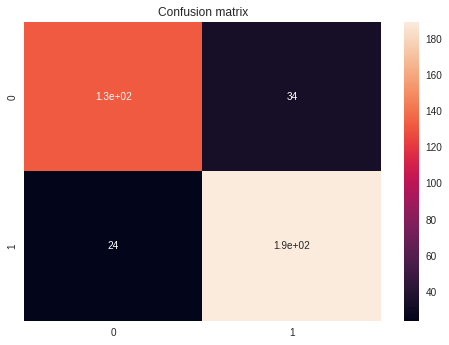

In [226]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0).fit(xtrain,ytrain)
pred = clf.predict(xtest)
print(classification_report(pred,ytest))
gen_conf(ytest,pred)

## Naive Bayes

              precision    recall  f1-score   support

           0       0.38      0.82      0.52        77
           1       0.93      0.66      0.77       302

    accuracy                           0.69       379
   macro avg       0.66      0.74      0.65       379
weighted avg       0.82      0.69      0.72       379



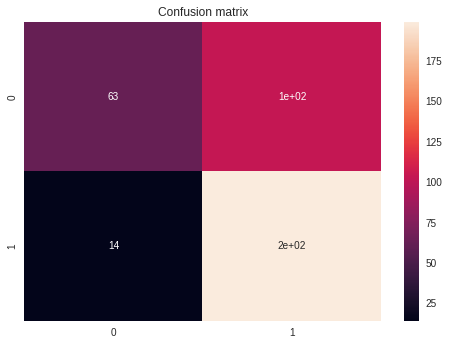

In [227]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
ypred = gnb.fit(xtrain,ytrain).predict(xtest)
print(classification_report(ypred,ytest))
gen_conf(ytest,ypred)

In [228]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (xtest.shape[0], (ytest != ypred).sum()))

Number of mislabeled points out of a total 379 points : 117


## Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       171
           1       0.76      0.78      0.77       208

    accuracy                           0.74       379
   macro avg       0.74      0.74      0.74       379
weighted avg       0.74      0.74      0.74       379



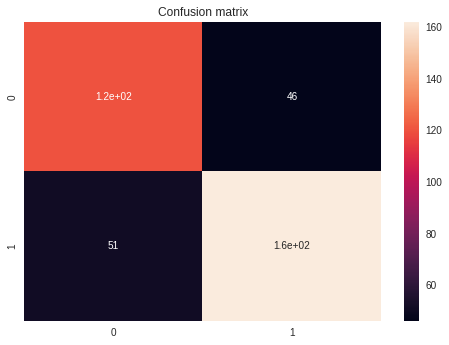

In [229]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
pred = dc.fit(xtrain,ytrain).predict(xtest)
print(classification_report(pred,ytest))
gen_conf(ytest,pred)

## Support Vector Machine

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       194
           1       0.77      0.89      0.83       185

    accuracy                           0.82       379
   macro avg       0.83      0.82      0.82       379
weighted avg       0.83      0.82      0.82       379



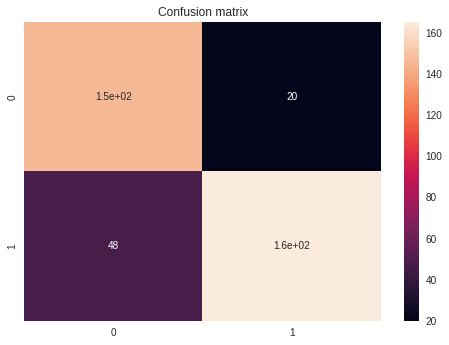

In [230]:
from sklearn import svm
clf = svm.SVC(class_weight = 'balanced')
clf.fit(xtrain, ytrain)
pred = clf.predict(xtest)
print(classification_report(pred,ytest))
gen_conf(ytest, pred)

## K Nearest Neighbour

              precision    recall  f1-score   support

           0       0.62      0.76      0.68       136
           1       0.85      0.74      0.79       243

    accuracy                           0.75       379
   macro avg       0.73      0.75      0.74       379
weighted avg       0.76      0.75      0.75       379



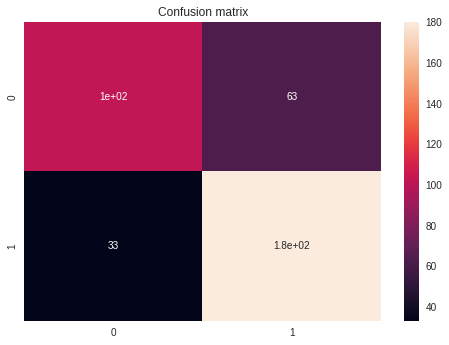

In [231]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
pred = knn.predict(xtest)
print(classification_report(pred,ytest))
gen_conf(ytest, pred)

## Logistic Regression and Support Vector Machine are Performing well.